<div class="alert alert-block alert-info"><strong>Content</strong></div>
<div class="list-group">
    <a class="list-group-item list-group-item-action" href="#ds">The Dataset</a>
    <a class="list-group-item list-group-item-action" href="#mda">Missing Data Aanalysis</a>
    <a class="list-group-item list-group-item-action" href="#out">Outliers</a>
    <a class="list-group-item list-group-item-action" href="#asu">Assumptions</a>
    <a class="list-group-item list-group-item-action" href="#fsu">Fix Assumptions</a>
    <a class="list-group-item list-group-item-action" href="#ols">Ordinary Least Squares(OLS)</a>
    <a class="list-group-item list-group-item-action" href="#mtt">Model Training and Testing</a>
    <a class="list-group-item list-group-item-action" href="#rf">References</a>
    
</div>

In this Test Case we are presenting a regression problem using a Linear Regression model. It is helpful to explain how SHAP values work with simple models and compare them to this highly interpretable model. 

The dataset used for this test case originates from UCI machine learning repository[citation]. The goal is to predict quality of the wine samples in the dataset. As seen in [table x], the data shows its features along with some descriptive statistics about its distribution. These are 12 features of red and white wine variants of "Vinho Verde" wine, with the quality being the target feature (0 being worst and 10 being best).

[tablex2 - stats distribution]

Linear models can be interpreted by examining its model coefficients ($\beta_p$, also known as weights) for each feature, which tells us how the prediction can change by modifying each input feature. For reference, the learning function is shown below, where $\beta_0$ is the intercept, $\beta_p$ are the coefficients, $\epsilon$ is the error (difference between prediction and actual value), and $x_p$ is the feature input:

$$y = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p + \epsilon$$(1)<br> 


The coefficient values of the trained model are shown below:

fixed acidity = 0.0437
volatile acidity = -1.0963
citric acid = -0.1649
residual sugar = 0.0297
chlorides = -1.8317
free sulfur dioxide = 0.0031
total sulfur dioxide = -0.0028
density = -32.0274
pH = -0.3095
sulphates = 0.9313
alcohol = 0.2634

These values provide good insight on how each input feature may affect the prediction, however, it does not mean it measures the importance of a feature[reference christoph book]. The coefficient dependency is related to the scale of the input, not its importance. If a measure where to be changed to different metrics(mililitters to litters), its coefficient value would dramatically change in the linear model. This is why the more non-linearity there is, the less accurate the model will become, as well as the coefficients calculated per feature.

To show feature importance, we can visualize a partial dependency plot. A partial dependece plot shows the relationship between the target and a feature in particular. As shown in [figure x pdp], the target value given the feature is shown on the y-axis, while the feature value is shown on the x-axis. Since this is a linear model, it is expected to show a clear linear relationship. 

[figure x pdp]







Dataset citation
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



<div class="alert alert-block alert-success" id='ds'><strong>The Dataset</strong></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error
%matplotlib inline

/Users/dgtzm99/opt/anaconda3/envs/keras_env/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# importing wine quality dataset
data = pd.read_csv('src/winequality-red.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1] # target: wine quality

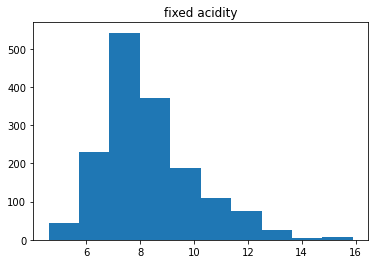

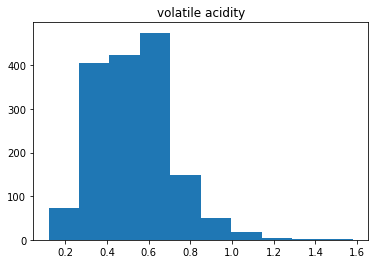

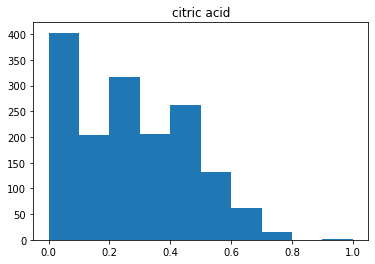

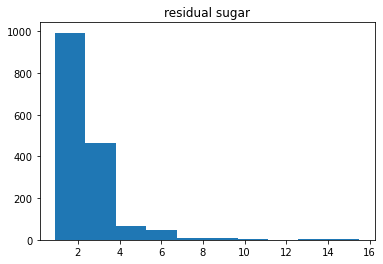

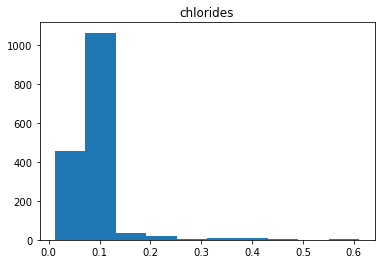

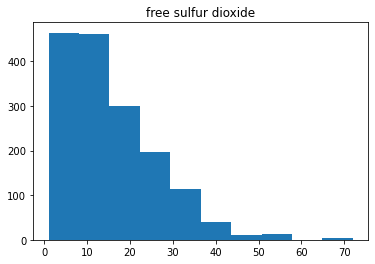

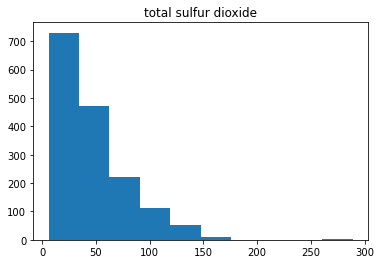

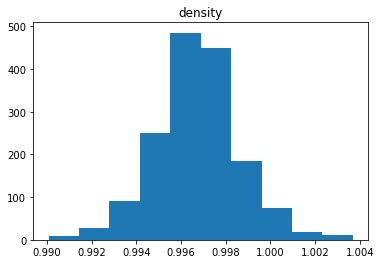

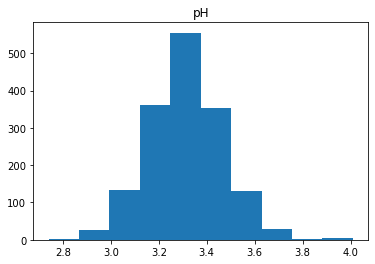

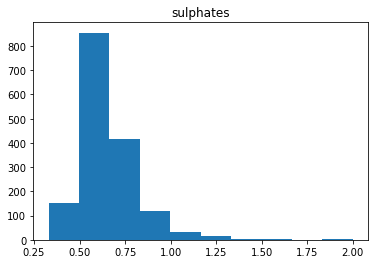

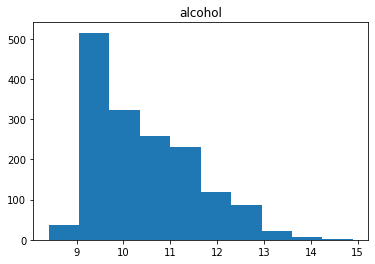

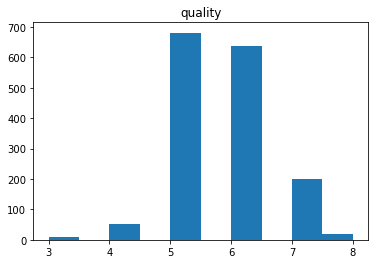

In [6]:
# Inspect data distribution
feature_names = data.columns
for feat in range(np.shape(data)[1]):
    plt.hist(x=data.iloc[:, feat])
    plt.title(feature_names[feat])
    plt.show()

In [7]:
data.describe().iloc[1:,:].T

,mean,std,min,25%,50%,75%,max
fixed acidity,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.15, random_state=0)
print('Train instances:', len(X_train))
print('Test instances:', len(X_test))

Train instances: 1359
Test instances: 240


In [9]:
# Fit the logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Test model predictions
y_pred = model.predict(X_test)
print(f"MSE {mean_squared_error(y_test, y_pred)}")

MSE 0.389247462724839


In [12]:
# Model coefficients
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

fixed acidity = 0.0437
volatile acidity = -1.0963
citric acid = -0.1649
residual sugar = 0.0297
chlorides = -1.8317
free sulfur dioxide = 0.0031
total sulfur dioxide = -0.0028
density = -32.0274
pH = -0.3095
sulphates = 0.9313
alcohol = 0.2634


In [13]:
# Compute SHAP values on test set
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X)

Permutation explainer: 1600it [00:14, 38.03it/s]                                                           


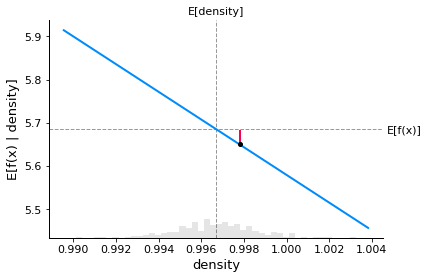

In [14]:
sample = 5
plot = shap.plots.partial_dependence(
    "density", model.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True,
    shap_values=shap_values[sample:sample+1,:]
)

In [29]:
np.shape(shap_values)

(1599, 11)

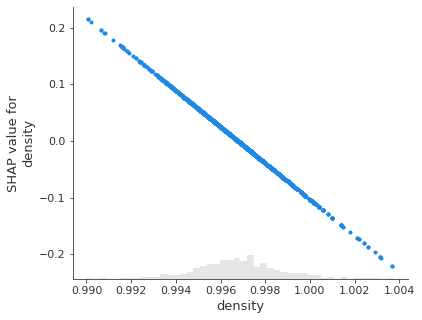

In [15]:
shap.plots.scatter(shap_values[:,"density"])

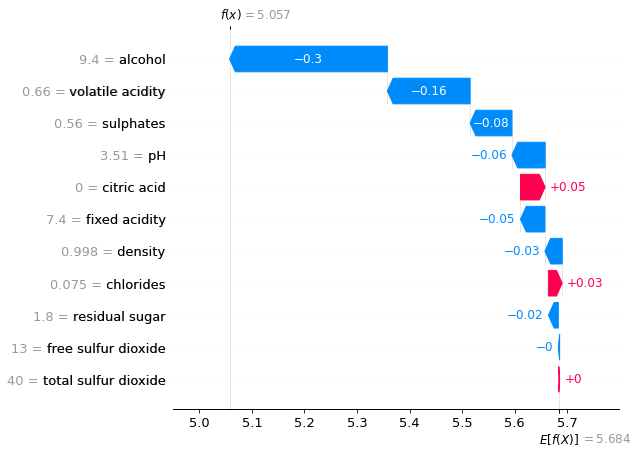

In [16]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample], max_display=14)

In [18]:
# Generate force plot - Single
shap.force_plot(base_value=shap_values.base_values[0], 
                shap_values=shap_values.values[sample,:], features=X.loc[sample,:])

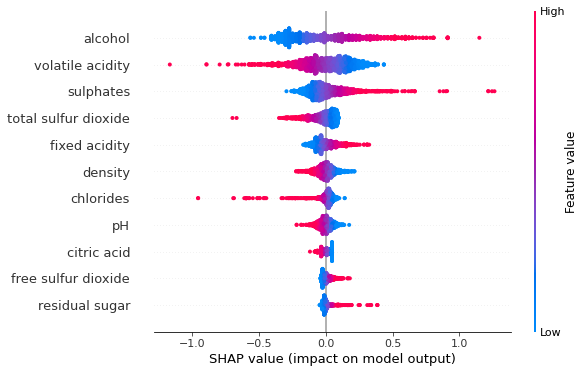

In [26]:
# Generate summary bar plot (Global)
shap.summary_plot(shap_values, X, show=False)
plt.gcf().axes[-1].set_aspect(150)
plt.gcf().axes[-1].set_box_aspect(100)

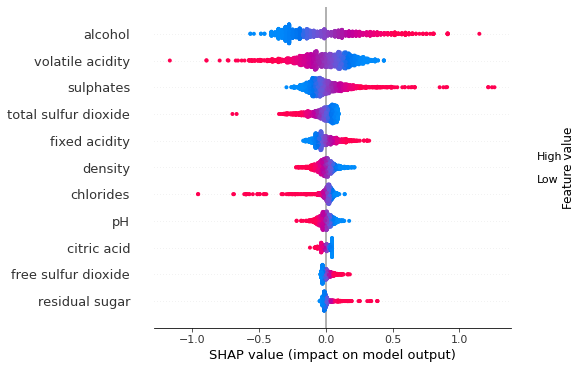

In [27]:
shap.plots.beeswarm(shap_values, max_display=11)

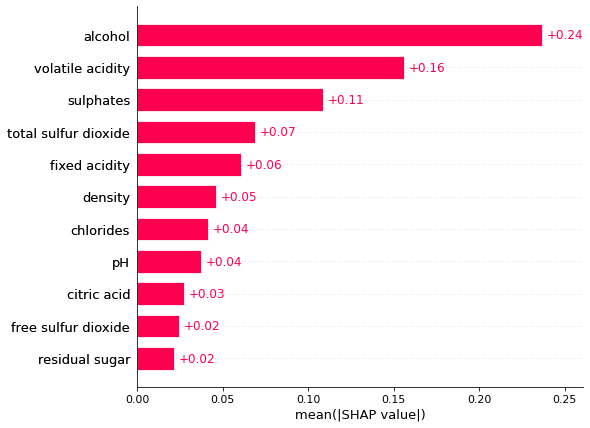

In [128]:
shap.plots.bar(shap_values, max_display=11)